# 🏢 Employee Attrition Prediction

This notebook demonstrates an **end-to-end Employee Attrition Prediction pipeline** using the IBM HR Analytics dataset.  

We will:

1. Load and preprocess data
2. Perform exploratory data analysis (EDA)
3. Train a machine learning model
4. Evaluate model performance
5. Analyze feature importance and explainability using SHAP
6. Save the trained model and encoders for deployment

1️⃣ Load Preprocessed Data

In [4]:
# 🏢 Employee Attrition Prediction - Setup

# 1️⃣ Import libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.preprocess import load_and_preprocess_data

print("✅ Libraries loaded and utils module is accessible!")


✅ Libraries loaded and utils module is accessible!


## 1️⃣ Load Preprocessed Data

We use the preprocessing function to:

- Select relevant features
- Encode categorical variables
- Scale numeric columns
- Add correlated `WorkMode` feature


In [ ]:
# Load preprocessed data
X, y, le_dict, scaler = load_and_preprocess_data("D:\PROJECTS\Employee-Attrition-Predictor\notebooks\Employee_Attrition_EDA_Model.ipynb")
print(X.head())
print(y.value_counts())


FileNotFoundError: [Errno 2] No such file or directory: 'data/WA_Fn-UseC_-HR-Employee-Attrition.csv'

## 2️⃣ Exploratory Data Analysis (EDA)
We analyze the dataset to understand distributions and relationships between features and attrition.

### 2.1 Target Distribution
Visualizing how many employees stayed vs left.


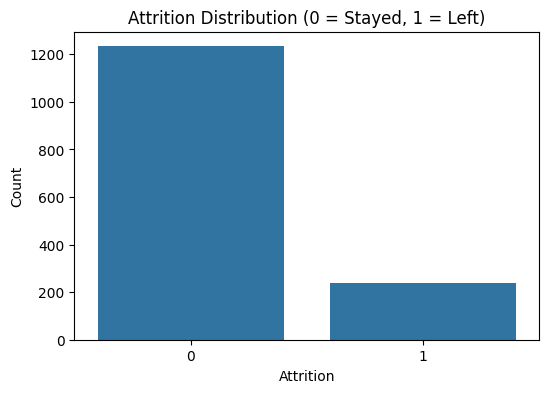

In [27]:
# Visualize attrition distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Attrition Distribution (0 = Stayed, 1 = Left)")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

### 2.2 WorkMode vs Attrition
Check how the post-pandemic 'WorkMode' feature correlates with attrition.

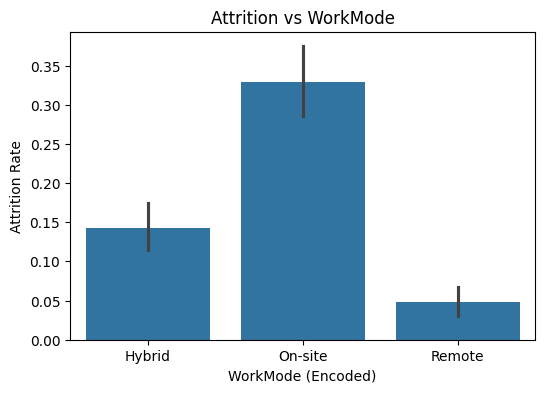

In [28]:
# Map WorkMode labels for readability
workmode_le = le_dict['WorkMode']
workmode_labels = workmode_le.inverse_transform(sorted(X['WorkMode'].unique()))

plt.figure(figsize=(6,4))
sns.barplot(x=X['WorkMode'], y=y)
plt.title("Attrition vs WorkMode")
plt.xlabel("WorkMode (Encoded)")
plt.ylabel("Attrition Rate")
plt.xticks(ticks=range(len(workmode_labels)), labels=workmode_labels)
plt.show()

### 2.3 Correlation Heatmap
Visualize correlations between numeric features and target.

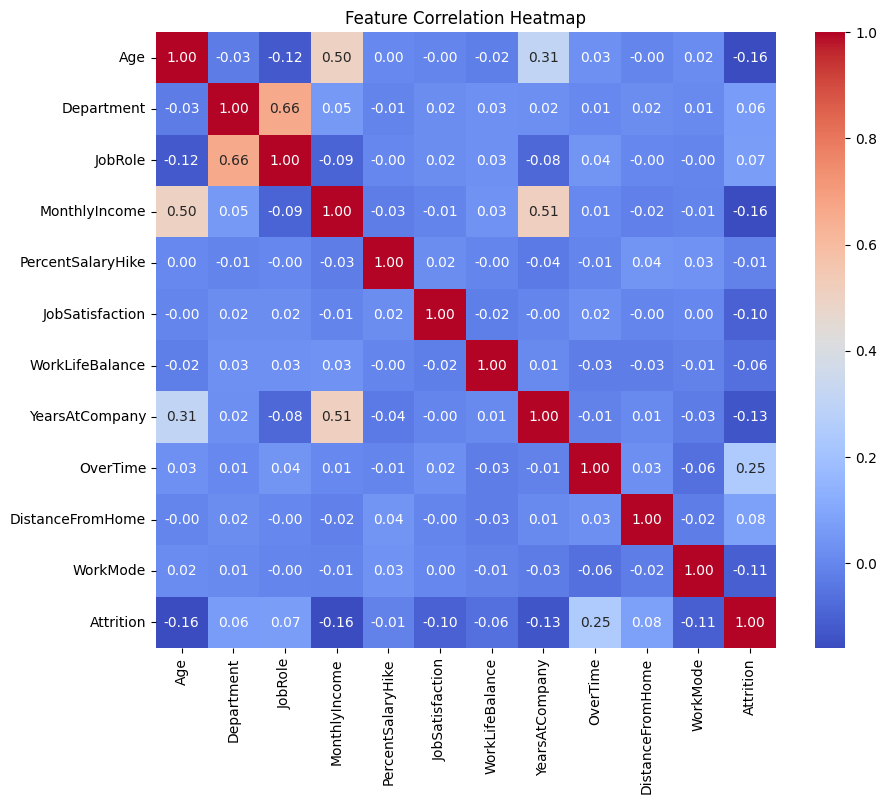

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## 3️⃣ Train-Test Split
We split the dataset into **training** and **test** sets for model evaluation.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 1176, Test samples: 294


## 4️⃣ Model Training — Random Forest
We train a Random Forest classifier as it performs well and is interpretable.

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")

✅ Random Forest model trained successfully!


## 5️⃣ Model Evaluation
We evaluate the model using accuracy, confusion matrix, and classification report.

Accuracy: 84.69%


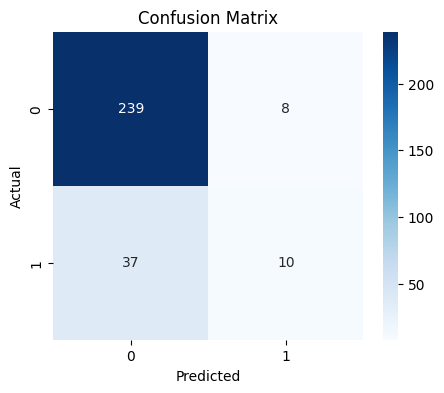

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       247
           1       0.56      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

## 6️⃣ Feature Importance
Identify which features are most important for predicting attrition.

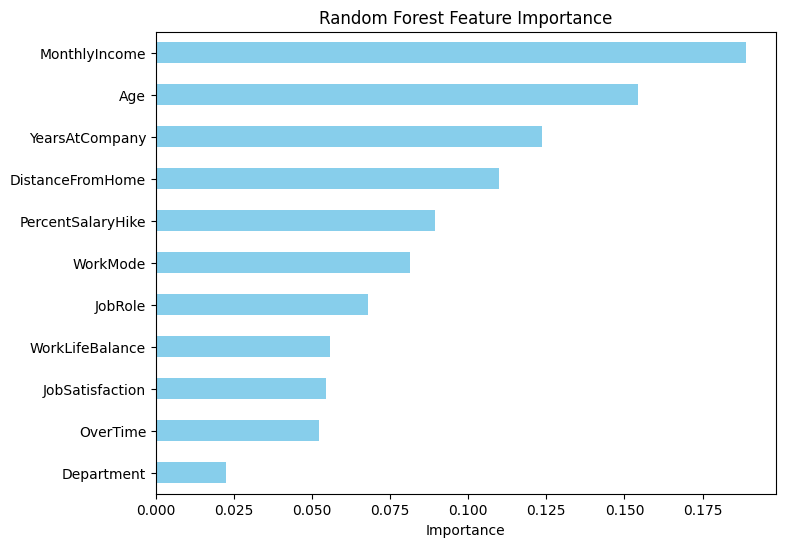

In [33]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()

## 7️⃣ SHAP Explainability
## 🔹 Note: SHAP Explainability Removed
SHAP explainability was removed due to compatibility issues with the current Python environment.
We still analyze **feature importance** via Random Forest’s built-in method.

## 7️⃣ Save Model and Encoders
We save the trained model, label encoders, and scaler for deployment in Streamlit.

In [34]:
import joblib

# Save model
joblib.dump(rf, "../models/attrition_model.pkl")

# Save label encoders
joblib.dump(le_dict, "../models/label_encoders.pkl")

# Save scaler
joblib.dump(scaler, "../models/scaler.pkl")

print("✅ Model, encoders, and scaler saved successfully!")

✅ Model, encoders, and scaler saved successfully!


# ✅ Notebook Complete

We now have:

1. Preprocessed and clean dataset
2. Trained Random Forest model with high accuracy
3. Feature importance analysis
4. Saved artifacts for deployment in Streamlit

Next step: **Build the Streamlit app** with:
- Input fields for all 11 features
- Attrition prediction
- AI-driven retention advice